# Customer_Segmentation_and_Clustering

# Imports_and_Data_Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
print("CUSTOMERS:")
print(customers_df.head(), "\n")
print("PRODUCTS:")
print(products_df.head(), "\n")
print("TRANSACTIONS:")
print(transactions_df.head(), "\n")

CUSTOMERS:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

PRODUCTS:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

TRANSACTIONS:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  20

In [4]:
print("Shape of Customers:", customers_df.shape)
print("Shape of Products :", products_df.shape)
print("Shape of Transactions:", transactions_df.shape)

Shape of Customers: (200, 4)
Shape of Products : (100, 4)
Shape of Transactions: (1000, 7)


In [5]:
print("\nMissing Values in Customers:\n", customers_df.isnull().sum())
print("\nMissing Values in Products:\n", products_df.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions_df.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

In [7]:
print("\nDuplicate Rows in Customers:", customers_df.duplicated().sum())
print("Duplicate Rows in Products:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions_df.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [8]:
invalid_cust_ids = set(transactions_df['CustomerID']) - set(customers_df['CustomerID'])
print(f"\nInvalid CustomerIDs in Transactions (not in Customers): {invalid_cust_ids}")


Invalid CustomerIDs in Transactions (not in Customers): set()


In [9]:
invalid_prod_ids = set(transactions_df['ProductID']) - set(products_df['ProductID'])
print(f"Invalid ProductIDs in Transactions (not in Products): {invalid_prod_ids}")

Invalid ProductIDs in Transactions (not in Products): set()


In [10]:
trans_cust_df = pd.merge(
    transactions_df, 
    customers_df[['CustomerID', 'Region']], 
    on='CustomerID', 
    how='left'
)

In [11]:
trans_cust_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,South America
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,North America
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,North America
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Asia


In [12]:
full_df = pd.merge(
    trans_cust_df,
    products_df[['ProductID', 'Category']],
    on='ProductID',
    how='left'
)

In [13]:
full_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe,Electronics
...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,South America,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,North America,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,North America,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Asia,Electronics


In [14]:
print("\nMerged DataFrame (full_df) preview:")
print(full_df.head())


Merged DataFrame (full_df) preview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price         Region     Category  
0      300.68  300.68         Europe  Electronics  
1      300.68  300.68           Asia  Electronics  
2      300.68  300.68         Europe  Electronics  
3      601.36  300.68  South America  Electronics  
4      902.04  300.68         Europe  Electronics  


In [15]:
cust_agg = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',     
    'Quantity': 'sum',         
    'TransactionID': 'count'   
}).rename(columns={
    'TotalValue': 'total_spend',
    'Quantity': 'total_qty',
    'TransactionID': 'trans_count'
}).reset_index()

In [16]:
cust_agg['avg_order_value'] = cust_agg['total_spend'] / cust_agg['trans_count']

#Incorporate_Category_Spend_Distribution

In [17]:
tx_merged = pd.merge(
    transactions_df,
    products_df[['ProductID', 'Category']],
    on='ProductID', 
    how='left'
)

In [18]:
cat_spend = tx_merged.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0)

In [19]:
cat_spend_fraction = cat_spend.div(cat_spend.sum(axis=1), axis=0).fillna(0)

In [20]:
customer_profile = customers_df[['CustomerID', 'Region']]

In [21]:
df_features = pd.merge(customer_profile, cust_agg, on='CustomerID', how='left')
df_features = pd.merge(df_features, cat_spend_fraction, on='CustomerID', how='left')

In [22]:
df_features.fillna(0, inplace=True)

#One-hot_encode_Region

In [23]:
df_features = pd.get_dummies(df_features, columns=['Region'], prefix='Region')

# Build_Feature_Matrix

In [24]:
customer_ids = df_features['CustomerID']

In [25]:
feature_cols = [col for col in df_features.columns if col != 'CustomerID']
X = df_features[feature_cols].values

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CLUSTERING_(K-Means)_AND_EVALUATION

In [27]:
results = []
k_range = range(2, 11)

In [28]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    

    db_index = davies_bouldin_score(X_scaled, labels)
    
    sil_score = silhouette_score(X_scaled, labels)
    
    results.append({
        'k': k,
        'db_index': db_index,
        'silhouette': sil_score
    })

python(20083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    db_index = davies_bouldin_score(X_scaled, labels)
    sil_score = silhouette_score(X_scaled, labels)
    
    print(f'Clusters: {k}, DB Index: {db_index}, Silhouette Score: {sil_score}')


Clusters: 2, DB Index: 2.157640385476406, Silhouette Score: 0.13494746436561567
Clusters: 3, DB Index: 2.0792802431367186, Silhouette Score: 0.13344173257184033
Clusters: 4, DB Index: 2.008314306460845, Silhouette Score: 0.1539420795099306
Clusters: 5, DB Index: 1.786389002958216, Silhouette Score: 0.15023062432237774
Clusters: 6, DB Index: 1.6541513648786799, Silhouette Score: 0.1854482307154129
Clusters: 7, DB Index: 1.3775031088209124, Silhouette Score: 0.2297281007328459
Clusters: 8, DB Index: 1.3998366424431066, Silhouette Score: 0.224863295761483
Clusters: 9, DB Index: 1.3523528674658505, Silhouette Score: 0.23757082194741927
Clusters: 10, DB Index: 1.4343669466319253, Silhouette Score: 0.22534803563850717


In [30]:
results_df = pd.DataFrame(results)
print("=== Clustering Metrics (KMeans) ===")
print(results_df)

=== Clustering Metrics (KMeans) ===
    k  db_index  silhouette
0   2  2.157640    0.134947
1   3  2.079280    0.133442
2   4  2.008314    0.153942
3   5  1.786389    0.150231
4   6  1.654151    0.185448
5   7  1.377503    0.229728
6   8  1.399837    0.224863
7   9  1.352353    0.237571
8  10  1.434367    0.225348


In [33]:
best_row = results_df.loc[results_df['db_index'].idxmin()]
best_k = best_row['k']
print(f"\nBest number of clusters based on DB Index: k={best_k:.0f} (DB Index={best_row['db_index']:.4f})")


Best number of clusters based on DB Index: k=9 (DB Index=1.3524)


# Final_Clustering_with_Best_K

In [34]:
final_kmeans = KMeans(n_clusters=int(best_k), random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)

In [35]:
df_features['Cluster'] = final_labels

In [36]:
final_db_index = davies_bouldin_score(X_scaled, final_labels)
final_silhouette = silhouette_score(X_scaled, final_labels)

In [37]:
print(f"\n=== FINAL CLUSTERING RESULTS (k={best_k:.0f}) ===")
print(f"Davies-Bouldin Index: {final_db_index:.4f}")
print(f"Silhouette Score:     {final_silhouette:.4f}")


=== FINAL CLUSTERING RESULTS (k=9) ===
Davies-Bouldin Index: 1.3524
Silhouette Score:     0.2376


#Cluster_sizes

In [38]:
cluster_counts = df_features['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_counts)


Cluster Sizes:
Cluster
0     9
1    30
2    19
3    34
4    21
5    40
6    12
7    24
8    11
Name: count, dtype: int64


# VISUALIZATION_OF_CLUSTERS_(2D PROJECTION USING PCA)

In [39]:
pca = PCA(n_components=2, random_state=42)
pca_2d = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    'PC1': pca_2d[:, 0],
    'PC2': pca_2d[:, 1],
    'Cluster': final_labels
})

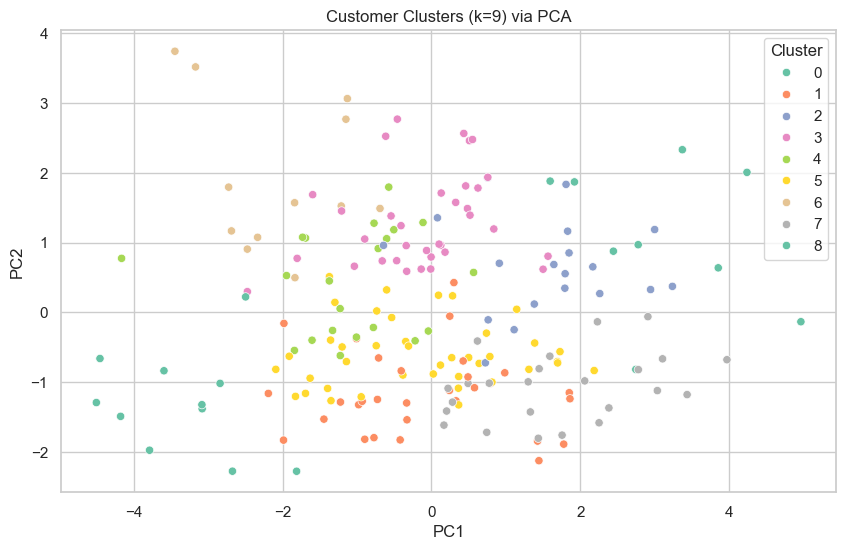

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title(f"Customer Clusters (k={int(best_k)}) via PCA")
plt.legend(title='Cluster')
plt.show()

In [41]:
print("\n===== CLUSTERING REPORT =====")
print(f"Number of Clusters: {int(best_k)}")
print(f"Davies-Bouldin Index: {final_db_index:.4f}")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Cluster Counts:\n{cluster_counts.to_string()}")
print("\nThe above metrics and visualization can guide business interpretation.\n")


===== CLUSTERING REPORT =====
Number of Clusters: 9
Davies-Bouldin Index: 1.3524
Silhouette Score: 0.2376
Cluster Counts:
Cluster
0     9
1    30
2    19
3    34
4    21
5    40
6    12
7    24
8    11

The above metrics and visualization can guide business interpretation.

